In [2]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import os
import json
%matplotlib inline
%pylab inline
import geopandas

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
os.system('curl -0 https://www.nrel.gov/gis/assets/data/california-wind-50m.zip')

0

In [4]:
os.system("mv " +  "california-wind-50m.zip " + os.getenv("PUIDATA"))     

256

In [5]:
os.system("unzip " + os.getenv("PUIDATA") + "/" + "california-wind-50m.zip")

2304

In [6]:
os.system("mv " + "california_50m_wind.shp " + os.getenv("PUIDATA"))

256

In [7]:
df = geopandas.GeoDataFrame.from_file(os.getenv("PUIDATA") + "/" + 'california_50m_wind.shp') 
df.head()

,ID,WPC,geometry
0,1,2,POLYGON ((-124.1962670582917 41.99373103107739...
1,2,2,POLYGON ((-124.1533435588694 41.99822782049714...
2,3,2,"POLYGON ((-124.133773264657 41.99585224227081,..."
3,4,4,POLYGON ((-124.1313771948061 41.99600189335192...
4,5,5,POLYGON ((-124.1289811067881 41.99615149484804...


In [8]:
df.crs

{'init': 'epsg:4326'}

In [9]:
os.system('curl -0 http://www.dot.ca.gov/hq/tsip/gis/datalibrary/zip/Boundaries/Cities2015.zip')

0

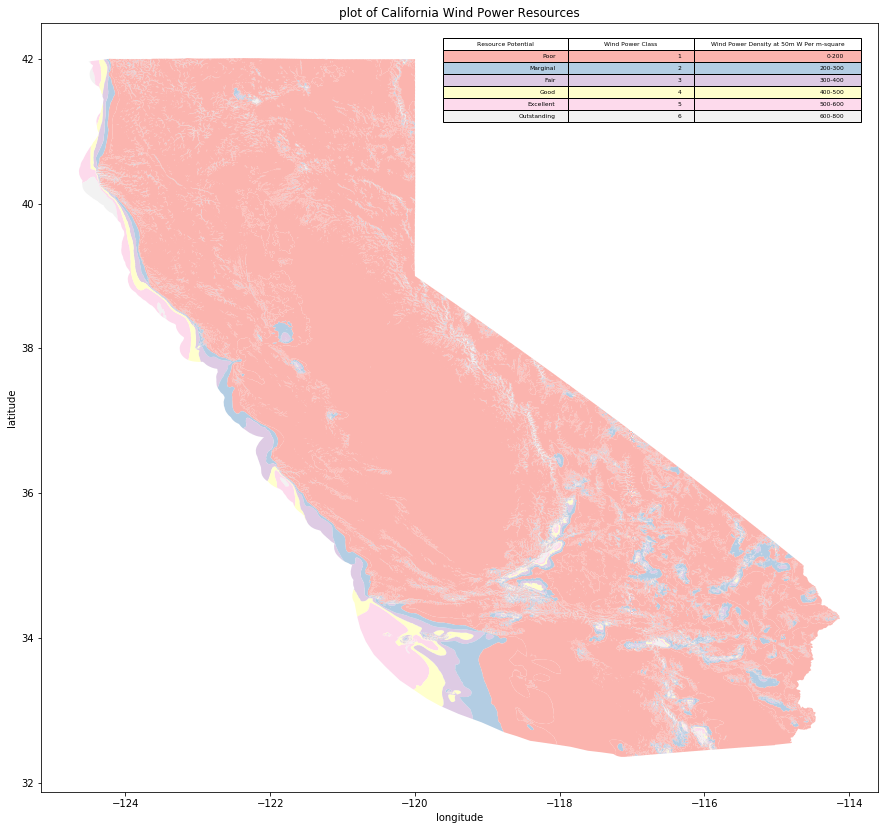

In [10]:
base = df.plot(column='WPC',legend=False,cmap='Pastel1',categorical = True,
        scheme='Equal_interval',k=6,figsize=(15,15))
valeur = np.array([0.05,0.15,0.4,0.6,0.85,0.9])
text=[["Poor","1",'0-200'],["Marginal","2",'200-300'],["Fair", "3",'300-400'],['Good','4','400-500'],['Excellent','5','500-600'],[u'Outstanding','6','600-800']]
colLabels = ["Resource Potential", 'Wind Power Class', u'Wind Power Density at 50m W Per m-square']
tab = base.table(cellText=text, colLabels=colLabels, colWidths = [0.15,0.15,0.2],    loc='upper right', cellColours=plt.cm.Pastel1(np.c_[valeur,valeur,valeur]))
plt.title('plot of California Wind Power Resources')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()


###  Figure 1:
Wind resouce available in California, United States. 

50-meter hub height wind resouces in California. 

Areas designated class 3 or greater are suitable for most utility-scale wind turbine applications, whereas class 2 areas are marginal for utility-scale applications but may be suitable for rural applications. Class 1 areas are generally not suitable.

Geographic Coordinate System Name: GCS_WGS_1984

These datasets are geographic shapefiles generated from original raster data. The data provide an estimate of annual average wind resource for states and regions. The data are separated into two groups: NREL-produced and AWS Truepower-produced/NREL-validated.

The Truepower-produced resource estimates factor in surface roughness in their calculations and do not exclude areas with slopes greater than 20%. These data were produced in cooperation with the U.S. Department of Energy WINDExchange program and have been validated by NREL and other wind energy meteorological consultants. 

